In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [30]:
df = pd.read_csv("data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 데이터 정보
- 'CLIENTNUM' : 고객 식별 번호
- 'Attrition_Flag' : 신용 카드 이탈 여부 
    - Existing Customer : 잔류
    - Attrited Customer : 탈퇴
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 고객 학력
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연소득 구간
- 'Card_Category' : 신용 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 월 수
- 'Contacts_Count_12_mon' : 연락 횟수
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- 'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'
- 'Total_Amt_Chng_Q4_Q1' : 결제 대금 기준 1분기 대비 4분기 (비율) 
- 'Total_Trans_Amt' : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- 'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [32]:
df.shape

(10127, 23)

In [33]:
# 나이브베이즈 컬럼 두개 삭제
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [34]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
# Customer_Age : 고객 나이
# Gender : 성별
# Dependent_count : 부양 가족 수

In [9]:
# 결측치 확인
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [35]:
gend_df = pd.DataFrame(Churn.loc[:,['Gender','Attrition_Flag']].value_counts())
gend_df

,,0
Gender,Attrition_Flag,
F,Existing Customer,4428
M,Existing Customer,4072
F,Attrited Customer,930
M,Attrited Customer,697


C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Customer_Age dist'}, xlabel='Customer_Age', ylabel='Density'>

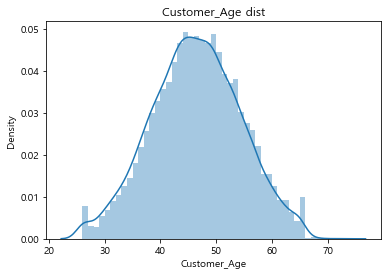

In [10]:
plt.title('Customer_Age dist')
sns.distplot(df["Customer_Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18c497bd7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c497bdeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c497bd460>],
 'medians': [<matplotlib.lines.Line2D at 0x18c497c95b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c497c9910>],
 'means': []}

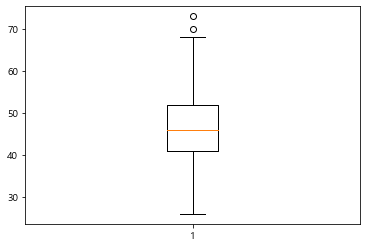

In [11]:
plt.boxplot(df["Customer_Age"])

In [12]:
# Q1 = Churn["Customer_Age"].quantile(.25)
# Q3 = Churn["Customer_Age"].quantile(.75)
# IQR_15 = (Q3-Q1)*1.5

In [13]:
# # 이상치 인덱스 찾기
# for i in Churn.index:
#     if Churn["Customer_Age"][i] > Q3 + IQR_15 or Churn["Customer_Age"][i] < Q1 - IQR_15 :
#         print(i)

251
254


In [14]:
# # 나이 이상치 삭제 처리
# Churn = Churn.drop(Churn.index[251], axis = 0)
# Churn = Churn.drop(Churn.index[254], axis = 0)

In [15]:
df.shape

(10125, 21)

## Gender preprocessing

In [16]:
df['Gender'].value_counts()

F    5357
M    4768
Name: Gender, dtype: int64

<AxesSubplot:>

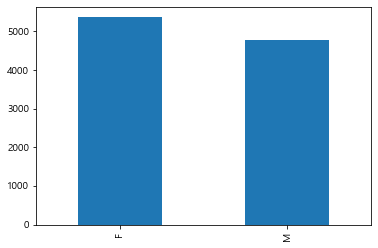

In [17]:
df['Gender'].value_counts().plot(kind = 'bar')

In [18]:
# 라벨링은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (https://john-analyst.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%A0%88%EC%9D%B4%EB%B8%94-%EC%9D%B8%EC%BD%94%EB%94%A9%EA%B3%BC-%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9-f0220df21df1)
# 그러므로 성별은 원핫 인코딩 진행
Gender_ohe = pd.get_dummies(df['Gender'])
Gender_ohe.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [37]:
# 데이터에 원핫 인코딩 컬럼 추가
df_ohe = pd.concat([df, Gender_ohe], axis = 1)
df_ohe.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0


In [38]:
df_ohe.shape

(10127, 23)

## Dependent_count Preprocessing

In [39]:
df_ohe['Dependent_count'].value_counts().index

Int64Index([3, 2, 1, 4, 0, 5], dtype='int64')

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='count'>

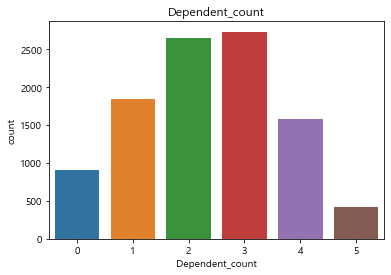

In [40]:
plt.title('Dependent_count')
sns.countplot(df_ohe["Dependent_count"])

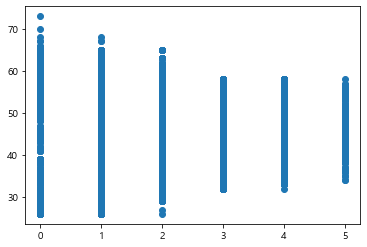

In [41]:
# 연령별 부양가족 수 (연령대로 범주 분할 후 재표현 필요)
plt.scatter(df_ohe["Dependent_count"], df_ohe["Customer_Age"])

In [58]:
bins = list(range(20,81,10))
bins

[20, 30, 40, 50, 60, 70, 80]

In [59]:
labels = [str(i) + '대' for i in bins]
labels

['20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [60]:
df_ohe["age_bin"] = pd.cut(df_ohe["Customer_Age"], bins = bins, right = False, labels=labels[:-1])
df_ohe.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M,age_bin
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0,40대
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0,40대
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0,50대
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0,40대
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0,40대


In [61]:
# 연령대별 평균 부양가족 수
dependent = df_ohe.groupby('age_bin')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
dependent

,age_bin,dependent
0,20대,0.430769
1,30대,2.002173
2,40대,2.970401
3,50대,2.055037
4,60대,0.530189
5,70대,0.000000


<AxesSubplot:xlabel='age_bin', ylabel='dependent'>

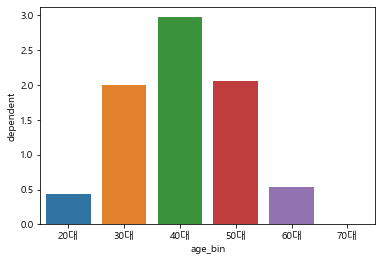

In [62]:
# 연령대별 평균 부양 가족 수
sns.barplot(x='age_bin',y='dependent',data=dependent)

In [63]:
# 성별 평균 부양가족 수
gender = df_ohe.groupby('Gender')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
gender

,Gender,dependent
0,F,2.340612
1,M,2.352485


In [64]:
age_churn = pd.DataFrame(df_ohe.loc[:,['age_bin','Attrition_Flag']].value_counts())
age_churn

,,0
age_bin,Attrition_Flag,
40대,Existing Customer,3789
50대,Existing Customer,2492
30대,Existing Customer,1580
40대,Attrited Customer,772
50대,Attrited Customer,506
60대,Existing Customer,459
30대,Attrited Customer,261
20대,Existing Customer,178
60대,Attrited Customer,71


In [65]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

NameError: name 'train' is not defined